## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [30]:
import pandas as pd
import numpy as np
import requests
import json
import gzip
import zipfile
import csv 
from datetime import datetime
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter

In [31]:
minfo=pd.read_csv('zippedData/rt.movie_info.tsv.gz',sep='\t')
reviews=pd.read_csv('zippedData/rt.reviews.tsv.gz',sep ='\t',encoding='latin1')
meta_data = pd.read_csv(r'C:\Users\Luke Sims\Documents\Flatiron\Microsoft_Film_Project\Extra Data\movies_metadata.csv')

C:\Users\Luke Sims\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Minfo Inspection

In [32]:
#A basic overview of the first 5 rows!
minfo.head(10)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN
9,15,When a diamond expedition in the Congo is lost...,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Frank Marshall,John Patrick Shanley,"Jun 9, 1995","Jul 27, 1999",NaN,NaN,108 minutes,NaN


In [33]:
#checking data types
minfo.dtypes

id               int64
synopsis        object
rating          object
genre           object
director        object
writer          object
theater_date    object
dvd_date        object
currency        object
box_office      object
runtime         object
studio          object
dtype: object

In [34]:
#Checking NA's in files
minfo.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [35]:
minfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


# Organizing

In [36]:
#Dropping all columns both irrelevant and littered with NA's
minfo.drop(columns = ['synopsis', 'currency', 'dvd_date', 'theater_date'], inplace=True )

In [37]:
#drops na's in the subset box_office, ratnings columns
minfo.dropna(subset = ['box_office','rating'], inplace = True)
minfo

,id,rating,genre,director,writer,box_office,runtime,studio
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"600,000",108 minutes,Entertainment One
6,10,PG-13,Comedy,Jake Kasdan,Mike White,"41,032,915",82 minutes,Paramount Pictures
7,13,R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"224,114",123 minutes,Sony Pictures Classics
8,14,R,Drama,Taylor Hackford,Mark Jacobson,"134,904",117 minutes,NaN
15,22,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"1,039,869",108 minutes,ATO Pictures
...,...,...,...,...,...,...,...,...
1541,1980,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,"25,335,935",119 minutes,Universal Pictures
1542,1981,NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,"1,416,189",129 minutes,Eros Entertainment
1545,1985,R,Horror|Mystery and Suspense,Sebastian Gutierrez,Sebastian Gutierrez,"59,371",98 minutes,IDP Distribution
1546,1986,PG,Art House and International|Comedy|Drama,NaN,NaN,"794,306",97 minutes,NaN


# Cleaning 

In [38]:
#removing string minutes
minfo['box_office'] = minfo['box_office'].str.replace(',','')
minfo['box_office'] = minfo['box_office'].str.replace(' ','')

In [39]:
#converted into float
minfo['box_office'] = minfo['box_office'].astype(float)

In [40]:
#creating a grouped by rating variable with a median value
minfo_ratinggrouped = minfo.groupby(by='rating').median()

In [41]:
#indexing the value
minfo_ratinggrouped.index

Index(['G', 'NC17', 'NR', 'PG', 'PG-13', 'R'], dtype='object', name='rating')

In [42]:
#sorting the variable of minfo_ratinggrouped values in numerical order 
minfo_ratinggrouped = minfo_ratinggrouped.sort_values('box_office', ascending=False)

In [43]:
#X values #height value
x = minfo_ratinggrouped.index
height = minfo_ratinggrouped['box_office']

# Graphing

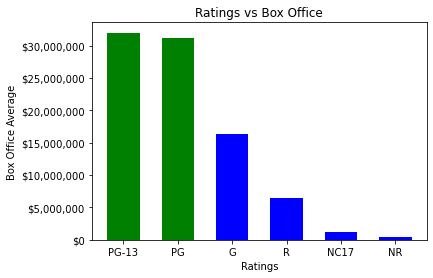

In [44]:
#adding market percentages to top and 

#color coding 
fig, ax=plt.subplots()
plt.bar(x, height, width = .6, color = ['green','green','blue','blue','blue','blue'])
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))

ax.set_xlabel('Ratings')
ax.set_ylabel('Box Office Average')
ax.set_title('Ratings vs Box Office');
plt.savefig('Ratings vs Box .png', dpi=300, bbox_inches='tight')


# Meta Data Inspection

###### 

In [45]:
#inspecting data
meta_data

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [46]:
#inspecting the information
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [47]:
#determing what is actually valid 
meta_data.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

# Organizing

In [48]:
#dropping irrelevant columns
meta_data.drop(columns = ['popularity','adult','genres','production_countries','original_title','original_language','imdb_id','poster_path','production_companies','vote_count','tagline','status','spoken_languages','overview','homepage','belongs_to_collection','video','vote_count'], inplace=True )

In [49]:
#rename relevant columns
meta_data.rename(columns = {'release_date':'released','title':'name','revenue':'box_office'}, inplace = True)

In [50]:
#adjustments to remove last 0's
meta_data = meta_data.loc[(meta_data['runtime'] != 0)] 
meta_data = meta_data.loc[(meta_data['box_office'] != 0)] 

In [51]:
#replacing na's in categories in box office and runtimes
meta_data.dropna(subset = ['box_office','runtime'], inplace = True)
meta_data

,budget,id,released,box_office,runtime,name,vote_average
0,30000000,862,1995-10-30,373554033.0,81.0,Toy Story,7.7
1,65000000,8844,1995-12-15,262797249.0,104.0,Jumanji,6.9
3,16000000,31357,1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1
4,0,11862,1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7
5,60000000,949,1995-12-15,187436818.0,170.0,Heat,7.7
...,...,...,...,...,...,...,...
45381,0,264269,2014-03-13,320395.0,90.0,Apartment 18,4.4
45401,0,240789,2009-10-09,50656.0,110.0,The Miracle,6.3
45409,800000,62757,2006-11-23,1328612.0,100.0,Savages,5.8
45412,2000000,63281,2010-09-30,1268793.0,107.0,Pro Lyuboff,4.0


In [52]:
meta_data['box_office'] = meta_data['box_office'].astype(float)
meta_data['box_office']

0        373554033.0
1        262797249.0
3         81452156.0
4         76578911.0
5        187436818.0
            ...     
45381       320395.0
45401        50656.0
45409      1328612.0
45412      1268793.0
45422      1413000.0
Name: box_office, Length: 7381, dtype: float64

In [53]:
#runtime indexed
meta_ratinggrouped = meta_data.groupby(by='runtime').mean()
meta_ratinggrouped.index

Float64Index([ 11.0,  25.0,  26.0,  38.0,  40.0,  42.0,  44.0,  46.0,  53.0,
               57.0,
              ...
              216.0, 219.0, 220.0, 224.0, 225.0, 238.0, 248.0, 254.0, 320.0,
              338.0],
             dtype='float64', name='runtime', length=166)

In [54]:
#defining varaibles for graphing
height2 = meta_ratinggrouped['box_office']
xa = meta_ratinggrouped.index

# Graphing

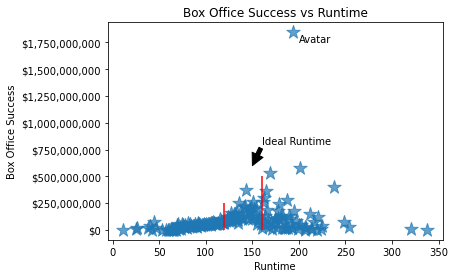

In [60]:
#Getting Ideal Runtime to be part

fig, ax=plt.subplots()
scatter = ax.scatter(xa, meta_ratinggrouped['box_office'],
           alpha=.7,
           s=200,
           marker='*')


#by billions 1,000,000,000
plt.ticklabel_format(style='plain')

ax.vlines(120, 250000000, ymax=300, color='red')
ax.vlines(160, 500000000, ymax=300, color='red')

ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
ax.set_xlabel('Runtime')
ax.set_ylabel('Box Office Success')
ax.set_title('Box Office Success vs Runtime')
ax.text(s = 'Avatar', x=200, y = 1750000000)
ax.annotate('Ideal Runtime', xy=(150, 600000000), xytext=(160 , 800000000), arrowprops={'facecolor': 'black'});


plt.savefig('Runtime vs Boxoffice.png', dpi=300, bbox_inches='tight')